- # [reference tutorial](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

## Preprocessing

In [1]:
# Import necessary libraries.
import numpy as np
import cv2

In [2]:
# Class names on which the model can perform.
CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [3]:
# Generating random colors for classes.
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [4]:
model = 'Pretrained_models/MobileNetSSD_deploy.caffemodel' # pretrained model weight directory.
prototxt = 'Pretrained_models/MobileNetSSD_deploy.prototxt.txt' # prototxt directory

## Model loading

In [5]:
print('Loading model ...')
net = cv2.dnn.readNetFromCaffe(prototxt, model) # Load the model.
print('Model loaded!!!')

Loading model ...
Model loaded!!!


## Loading image.

In [8]:
img = cv2.imread('Images/image.jpg') # take an input image.

In [9]:
(h, w) = img.shape[:2] # Get the shape of the image.
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 0.007843, (300, 300), 127.5) # Create a blob from image.

- [blobFromImage] creates 4-dimensional blob from image. Optionally resizes and crops image from center, subtract mean values, scales values by scalefactor, swap Blue and Red channels.

In [10]:
blob.shape, img.shape

((1, 3, 300, 300), (596, 900, 3))

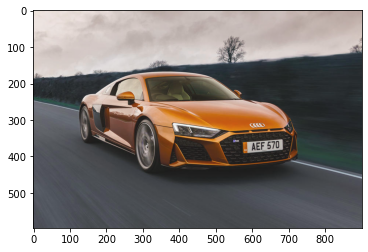

In [11]:
import matplotlib.pyplot as plt
plt.imshow(img)

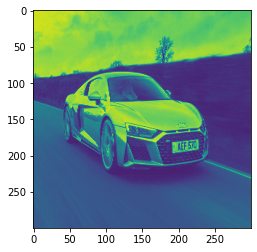

In [12]:
plt.imshow(blob[0][0])

## Forward propagation

In [13]:
print('Computing object detections...')
net.setInput(blob) # take the blob as input.
detections = net.forward() # Forward propagation through the network.

Computing object detections...


## Let's detect the image

In [14]:
for i in np.arange(0, detections.shape[2]):
    
    confidence = detections[0, 0, i, 2]
    if confidence > 0.3:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype('int')
        
        # display the prediction
        label = '{}:{:.2f}%'.format(CLASSES[idx], confidence * 100)
        print('{}'.format(label))
        cv2.rectangle(img, (startX, startY), (endX, endY), COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(img, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
        

car:100.00%


In [15]:
cv2.imshow('Output', img) # Display the image.
cv2.waitKey(0) 
cv2.destroyAllWindows()

## Object detection in realtime 
- This is the implementation of same as above but in real time ofcourse with slight modification. I've taken the input from camera and performed the detection over it.

In [19]:
import cv2

cap = cv2.VideoCapture(0) # get the video capture object.
while(True):
    
    ret, frame = cap.read() # read the video frame by frame
    (h, w) = frame.shape[:2] # height and width of the frame
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 0.007843, (300, 300), 127.5) # resize, crop and scale the image, calculate mean value.

    print('Computing object detections...')
    net.setInput(blob) # take the input
    detections = net.forward() # Forward propagating through the network
    for i in np.arange(0, detections.shape[2]): # Iterate through detections.
    
        confidence = detections[0, 0, i, 2]
        if confidence > 0.3: # if the confidence is greater than threshold value(30)
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h]) # get the bouding boxes' coordinates.
            (startX, startY, endX, endY) = box.astype('int') # Convert coordinates to integer.

            # display the prediction
            label = '{}:{:.2f}%'.format(CLASSES[idx], confidence * 100)
            print('{}'.format(label))
            cv2.rectangle(frame, (startX, startY), (endX, endY), COLORS[idx], 2) # Draw bounding box
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2) # Write on the frame.
    cv2.imshow("Real time", frame)    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()    # release the cap
cv2.destroyAllWindows() # destroy all opened windows 

Computing object detections...
person:82.57%
Computing object detections...
person:75.20%
Computing object detections...
person:76.87%
Computing object detections...
person:85.20%
Computing object detections...
person:81.92%
Computing object detections...
person:83.20%
Computing object detections...
person:88.55%
Computing object detections...
person:82.75%
Computing object detections...
person:87.98%
Computing object detections...
person:87.38%
Computing object detections...
person:89.05%
Computing object detections...
person:77.15%
Computing object detections...
person:91.99%
Computing object detections...
person:85.42%
Computing object detections...
person:72.38%
Computing object detections...
person:93.70%
Computing object detections...
person:90.44%
Computing object detections...
person:93.75%
Computing object detections...
person:90.33%
Computing object detections...
person:80.58%
Computing object detections...
person:90.59%
Computing object detections...
person:92.11%
Computing 

person:99.34%
bottle:46.42%
Computing object detections...
person:99.11%
bottle:59.20%
Computing object detections...
person:99.23%
Computing object detections...
person:99.49%
Computing object detections...
person:99.91%
Computing object detections...
person:99.42%
Computing object detections...
person:99.78%
Computing object detections...
person:99.78%
Computing object detections...
person:99.45%
Computing object detections...
person:99.83%
Computing object detections...
person:99.86%
Computing object detections...
person:99.80%
Computing object detections...
person:99.90%
chair:36.67%
Computing object detections...
person:99.64%
Computing object detections...
person:99.70%
Computing object detections...
person:99.79%
Computing object detections...
person:99.66%
Computing object detections...
person:99.78%
Computing object detections...
person:99.81%
Computing object detections...
person:99.83%
Computing object detections...
person:99.84%
Computing object detections...
person:98.49%


person:99.95%
Computing object detections...
person:99.95%
Computing object detections...
person:99.95%
Computing object detections...
person:99.96%
Computing object detections...
person:99.93%
Computing object detections...
person:99.94%
Computing object detections...
person:99.93%
Computing object detections...
person:99.95%
Computing object detections...
person:99.93%
Computing object detections...
person:99.94%
Computing object detections...
person:99.91%
Computing object detections...
person:99.94%
Computing object detections...
person:99.93%
Computing object detections...
person:99.91%
Computing object detections...
person:99.92%
Computing object detections...
person:99.89%
Computing object detections...
person:99.87%
Computing object detections...
person:99.87%
Computing object detections...
person:99.74%
Computing object detections...
person:99.93%
Computing object detections...
person:99.92%
Computing object detections...
person:99.89%
Computing object detections...
person:99.

person:99.91%
Computing object detections...
person:99.93%
Computing object detections...
person:99.88%
Computing object detections...
person:99.84%
Computing object detections...
person:99.85%
Computing object detections...
person:99.91%
Computing object detections...
person:99.80%
Computing object detections...
person:99.88%
Computing object detections...
person:99.81%
Computing object detections...
person:99.86%
Computing object detections...
person:99.89%
Computing object detections...
person:99.88%
Computing object detections...
person:99.86%
Computing object detections...
person:99.89%
Computing object detections...
person:99.93%
Computing object detections...
person:99.58%
Computing object detections...
person:99.54%
Computing object detections...
person:99.88%
Computing object detections...
person:99.85%
Computing object detections...
person:99.87%
Computing object detections...
person:99.96%
Computing object detections...
person:99.93%
Computing object detections...
person:99.